In [87]:
#LADI HARISH KUMAR #20MAI0052 #Deep Learning and its Applications (CSE6037) LAB

In [114]:
#importing required libraries 
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt

In [115]:
#reading the image from the local drive
cat=cv2.imread("C:/cat_image.jpg")#update the path of image
#resizing the image square dimension
cat=cv2.resize(cat,(300,300))
#defining the filter of 3 X 3 size and applying it first
#filter1=np.array([(1,1,1),(1,1,1),(1,1,1)])*(1/9)
#defining the filter of 5 X 5 size and comapre it
filter1=np.array([(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1),(1,1,1,1,1)])*(1/25)
print(filter1)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


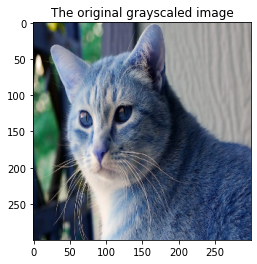

In [116]:
C=cat.shape
F=filter1.shape
#converting the colouerd cat image into grayscale image or (Binary conversion)
cat_gray=cv2.cvtColor(cat,cv2.COLOR_BGR2GRAY)
plt.title("The original coloured image")
plt.imshow(cat)

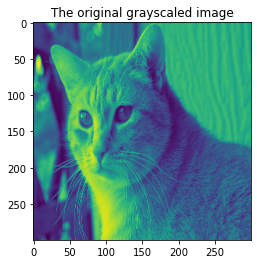

In [117]:
plt.title("The original grayscaled image")
plt.imshow(cat_gray)

In [118]:
print(cat_gray)

[[ 50  49  48 ... 155 154 155]
 [ 51  50  49 ... 152 152 153]
 [ 51  51  50 ... 149 150 154]
 ...
 [ 30  29  28 ...  84  92  95]
 [ 30  28  26 ...  68  65  63]
 [ 29  28  25 ...  64  59  74]]


In [119]:
print(cat_gray)
print(type(cat_gray))
cat_gray2=cat_gray
print(cat_gray2)
print(type(cat_gray2))

[[ 50  49  48 ... 155 154 155]
 [ 51  50  49 ... 152 152 153]
 [ 51  51  50 ... 149 150 154]
 ...
 [ 30  29  28 ...  84  92  95]
 [ 30  28  26 ...  68  65  63]
 [ 29  28  25 ...  64  59  74]]
<class 'numpy.ndarray'>
[[ 50  49  48 ... 155 154 155]
 [ 51  50  49 ... 152 152 153]
 [ 51  51  50 ... 149 150 154]
 ...
 [ 30  29  28 ...  84  92  95]
 [ 30  28  26 ...  68  65  63]
 [ 29  28  25 ...  64  59  74]]
<class 'numpy.ndarray'>


51
[[51 51 51 ... 37 19  7]
 [51 51 51 ... 37 19  7]
 [51 51 51 ... 37 19  7]
 ...
 [ 7  7  7 ...  5  3  1]
 [ 4  4  4 ...  2  2  1]
 [ 2  2  2 ...  1  1  1]]


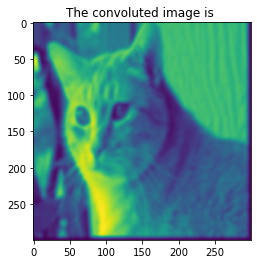

In [121]:
#(2A) Applying Box filter of 3 X 3 and 5 X 5 and comapre it.
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)
X1=np.array([(1,1,1),(1,1,1),(1,1,1)])*(1/9)
X2=np.array([(50,50,49),(51,50,50),(51,50,50)])
print(pro_sum(X1,X2))
for i in range(C[0]):
    for j in range(C[1]):
        k = cat_gray[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        cat_gray2[i][j]=l
print(cat_gray2)   
plt.title("The convoluted image is ")
plt.imshow(cat_gray2)

[[51 51 51 ... 13  6  2]
 [51 51 51 ... 13  6  2]
 [51 51 51 ... 13  6  2]
 ...
 [ 3  4  4 ...  1  1  1]
 [ 2  2  2 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


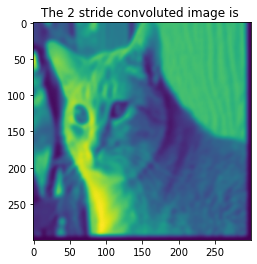

In [122]:
#(2B)Applying Box filter of 3 X 3 and 5 X 5 and comapre it.HERE THE STRIDE=2
cat_gray3=cat_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = cat_gray[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        cat_gray3[i][j]=l
        j+=1 #here the stride is 2 or filter jumps by 2 pixals intead of 1
    i+=1
print(cat_gray3)        
plt.title("The 2 stride convoluted image is ")
plt.imshow(cat_gray3)

In [84]:
#(2C) Apply zero padding before applying Box filter of 3 X 3 and 5 X 5 and comapre it
A=C[0]+F[0]-1
B=C[1]+F[1]-1
Y= np.zeros((A,B))#creating the image of all zero intensity pixals
print(Y)
print(Y.shape)
Z=Y

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(604, 604)


In [85]:
#fitting the input image in the centre of zero intensity pixals image Y to form zero padeded image Z
for i in range(C[0]):
    for j in range(C[1]):
        m=np.int((F[0]-1)/2)
        n=np.int((F[1]-1)/2)
        Z[i+m,j+n]=cat_gray[i,j]
print("The pixal values after zero padding is ")
print(Z)
print(Z.shape)
print(Z[0,0],Z[1,1])

The pixal values after zero padding is 
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 51. ...  7.  0.  0.]
 ...
 [ 0.  0.  2. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(604, 604)
0.0 0.0


[[ 19  25  31 ...  75  77  80]
 [ 25  33  41 ... 100 103 106]
 [ 31  41  51 ... 124 128 132]
 ...
 [ 76 102 127 ...  73  72  72]
 [ 76 101 126 ...  73  72  72]
 [ 75 100 125 ...  72  71  71]]


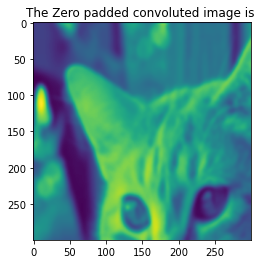

In [123]:
cat_gray4=cat_gray
import math
def pro_sum(m,n):
    sum=0
    for i in range(m.shape[0]):
        for j in range(m.shape[1]):
            sum=sum+(m[i,j]*n[i,j])
    return math.ceil(sum)

for i in range(C[0]):
    for j in range(C[1]):
        k = Z[i:i+F[0],j:j+F[1]]#slicing the image in the form of multiple filter dimension 
        l = pro_sum(k,filter1)
        cat_gray3[i][j]=l

print(cat_gray3)        
plt.title("The Zero padded convoluted image is ")
plt.imshow(cat_gray4)

In [124]:
#Entropy of the input image
import skimage.measure    
entropy = skimage.measure.shannon_entropy(cat_gray)
print(entropy)

7.613318752304868
